In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

In [22]:
import warnings
warnings.filterwarnings('ignore')

star_df = pd.read_csv('/content/Star Classification Dataset.csv')
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [4]:
star_df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [5]:
star_df.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M
8,2650,0.000690,0.1100,17.45,0,Red,M
9,2700,0.000180,0.1300,16.05,0,Red,M


Color                 Count
-----------------------------
 Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64





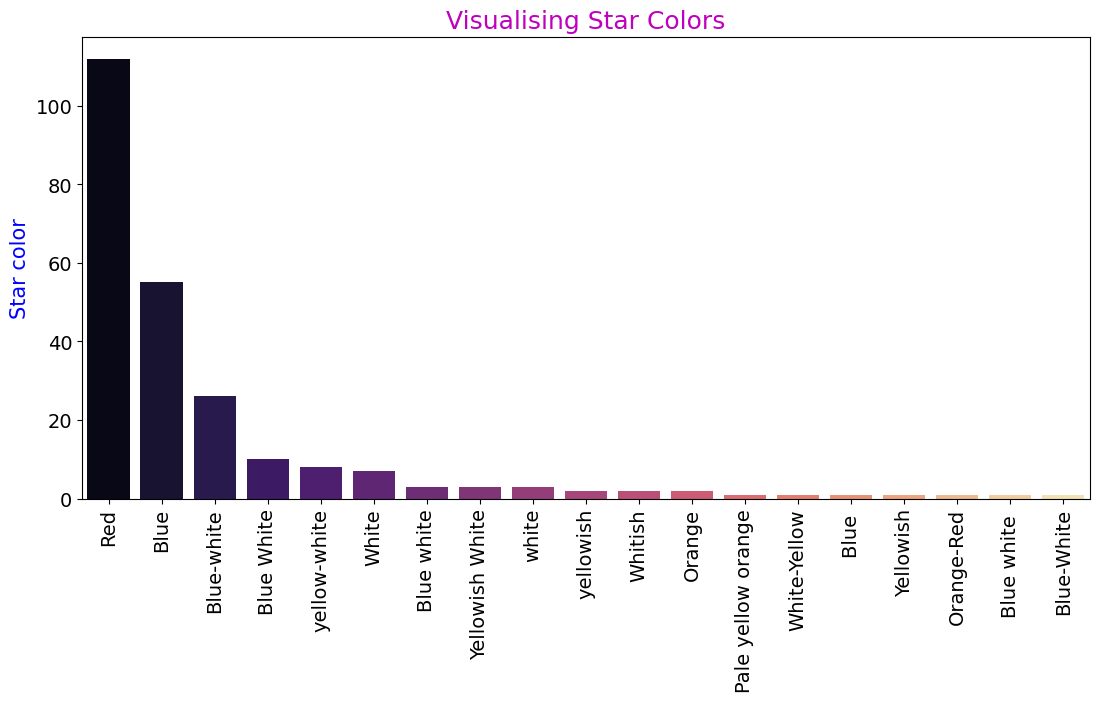

In [6]:
print("Color                 Count\n-----------------------------\n",
star_df['Star color'].value_counts())

print("\n\n")

## Visulaising the Star color data
plt.figure(figsize = (13, 6))
color = pd.DataFrame(star_df['Star color'].value_counts().sort_values(ascending=False))
ax = sns.barplot(x = color.index, y = 'Star color' , data = color, palette='magma')
plt.title("Visualising Star Colors", color = "m", fontsize = 18)
plt.ylabel('Star color', color = 'b', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [7]:
star_df.replace({"Star color" : {"Blue-white" : "Blue-White",
                                  "Blue White" : "Blue-White",
                                  "Blue white" : "Blue-White",
                                  "Blue white " : "Blue-White",
                                  "Blue-White" : "Blue-White",
                                  "yellow-white" : "Yellow-White",
                                  "Yellowish White" : "Yellow-White",
                                  "yellowish" : "Yellow-White",
                                  "White-Yellow" : "Yellow-White",
                                  "Yellowish" : "Yellow-White",
                                  "white" : "White",
                                  "Whitish" : "White",
                                  "Blue " : "Blue",
                                  "Pale yellow orange" : "Red",
                                  "Orange" : "Red",
                                  "Orange-Red" : "Red"}},
                                  inplace = True)
print("Color           Count\n-----------------------------\n", star_df['Star color'].value_counts())

Color           Count
-----------------------------
 Red             116
Blue             56
Blue-White       41
Yellow-White     15
White            12
Name: Star color, dtype: int64


Class Count
-------------------
 M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64





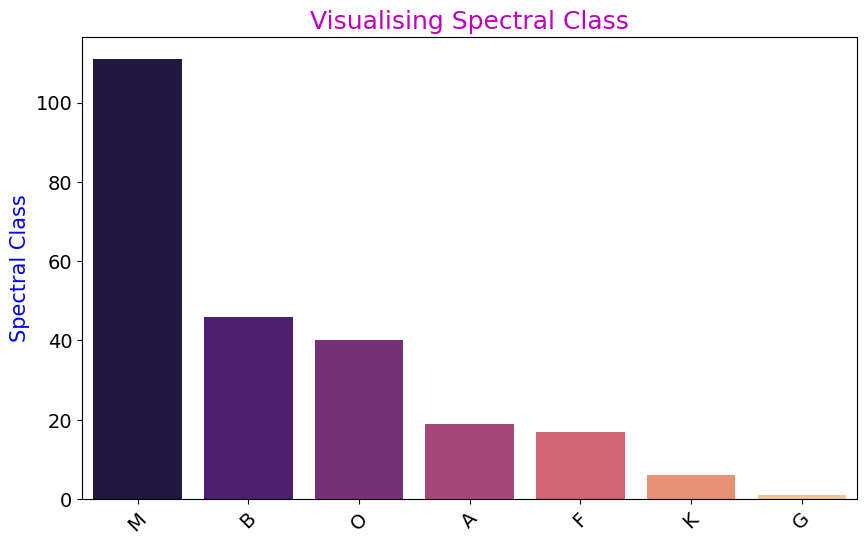

In [8]:
print("Class Count\n-------------------\n", star_df['Spectral Class'].value_counts())
spectral_class = pd.DataFrame(star_df['Spectral Class'].value_counts().sort_values(ascending=False))

print("\n\n")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x = spectral_class.index, y = 'Spectral Class' , data = spectral_class, palette='magma')
plt.title("Visualising Spectral Class", color = "m", fontsize = 18)
plt.ylabel('Spectral Class', color = 'b', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

<Axes: >

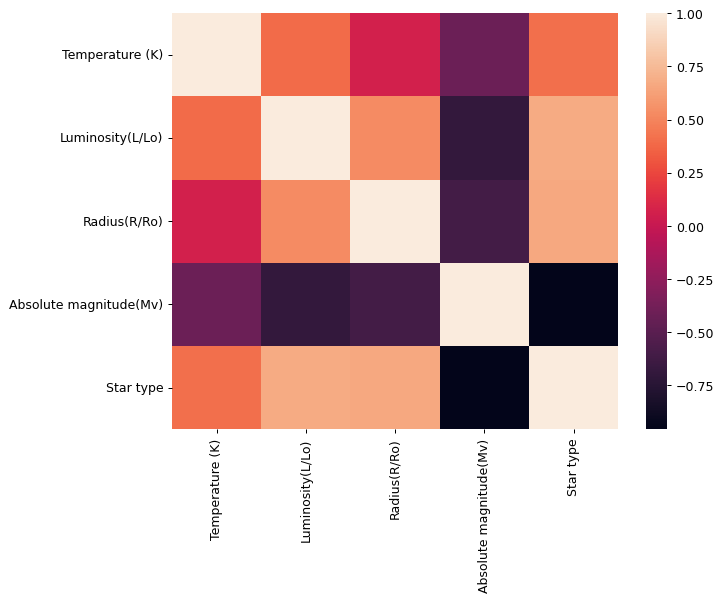

In [9]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 90)
sns.heatmap(star_df.corr(), ax = ax)

<Axes: ylabel='count'>

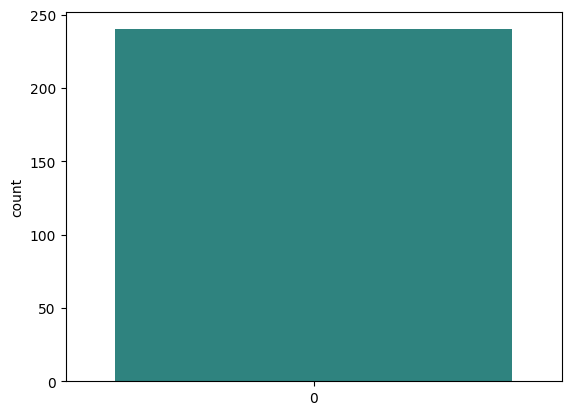

In [10]:
sns.countplot(star_df['Star type'], palette = "viridis")

In [12]:
X = star_df[["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)"]]
X

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [16]:
y= star_df['Star type']

In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star type, Length: 240, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [19]:
print("X_train \n", X_train)
print()
print("y_train \n", y_train)

X_train 
      Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)
36              6757           1.43000       1.12000                   2.410
140            13420           0.00059       0.00981                  13.670
61              3432           0.00067       0.19000                  16.940
22              7220           0.00017       0.01100                  14.230
118             6850      229000.00000    1467.00000                 -10.070
..               ...               ...           ...                     ...
106            24630      363000.00000      63.00000                  -5.830
14              2650           0.00060       0.14000                  11.782
92              4077           0.08500       0.79500                   6.228
179            24490      248490.00000    1134.50000                  -8.240
102            23000      127000.00000      36.00000                  -5.760

[120 rows x 4 columns]

y_train 
 36     3
140    2
61     0
22  

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [21]:
from sklearn.metrics import classification_report

## Predictions + Report
predictions = logreg.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       1.00      0.85      0.92        20
           2       1.00      1.00      1.00        21
           3       1.00      0.95      0.97        19
           4       0.87      1.00      0.93        20
           5       1.00      0.90      0.95        21

    accuracy                           0.95       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.96      0.95      0.95       120

